# Otimização de filtros

Utilizaremos o Pytorch para gerar filtros que realizem operações específicas através de otimização.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image

### Uso do Pytorch para o cálculo de gradiente

In [17]:
x1 = torch.tensor(5., requires_grad=True)
x2 = torch.tensor(2., requires_grad=True)

y = 2*x1**2 + 5*x2**5

# Calcula o gradiente de y em relação a x1 e x2, que deve ser 
# (4*x1, 25*x2**4) = (20, 400). Os valores são salvos no atributo 
# .grad de x1 e x2
y.backward()
print(x1.grad)
print(x2.grad)

tensor(20.)
tensor(400.)


### E se quisermos reduzir o valor de y?

Modificamos o valor de x1 e x2 na direção do gradiente

In [18]:
learning_rate = 0.001
print(y)
# Todas as operações aritméticas realizadas no código são armazenadas pelo Pytorch
# para o cálculo do gradiente. Se quisermos alterar o valor de uma variável sem
# contabilizar para o cálculo do gradiente, utilizamos o contexto torch.no_grad()
with torch.no_grad():
    x1 -= learning_rate*x1.grad
    x2 -= learning_rate*x2.grad
y = 2*x1**2 + 5*x2**5
print(y)

tensor(210., grad_fn=<AddBackward0>)
tensor(102.0296, grad_fn=<AddBackward0>)


In [19]:
# Realiza 5000 iterações
for i in range(5000):
    # Por padrão no Pytorch, o comando y.backward() calcula o gradiente e
    # soma o valor calculado com o valor do gradiente calculado anteriormente.
    # Para evitarmos essa soma, precisamos zerar os gradientes anterioemente calculados
    x1.grad.zero_()
    x2.grad.zero_()
    y.backward()
    with torch.no_grad():
        x1 -= learning_rate*x1.grad
        x2 -= learning_rate*x2.grad
    y = 2*x1**2 + 5*x2**5
    print(y)

tensor(79.7529, grad_fn=<AddBackward0>)
tensor(69.6047, grad_fn=<AddBackward0>)
tensor(63.7806, grad_fn=<AddBackward0>)
tensor(59.9811, grad_fn=<AddBackward0>)
tensor(57.2831, grad_fn=<AddBackward0>)
tensor(55.2460, grad_fn=<AddBackward0>)
tensor(53.6340, grad_fn=<AddBackward0>)
tensor(52.3104, grad_fn=<AddBackward0>)
tensor(51.1905, grad_fn=<AddBackward0>)
tensor(50.2196, grad_fn=<AddBackward0>)
tensor(49.3609, grad_fn=<AddBackward0>)
tensor(48.5885, grad_fn=<AddBackward0>)
tensor(47.8839, grad_fn=<AddBackward0>)
tensor(47.2337, grad_fn=<AddBackward0>)
tensor(46.6278, grad_fn=<AddBackward0>)
tensor(46.0584, grad_fn=<AddBackward0>)
tensor(45.5196, grad_fn=<AddBackward0>)
tensor(45.0066, grad_fn=<AddBackward0>)
tensor(44.5157, grad_fn=<AddBackward0>)
tensor(44.0440, grad_fn=<AddBackward0>)
tensor(43.5890, grad_fn=<AddBackward0>)
tensor(43.1487, grad_fn=<AddBackward0>)
tensor(42.7215, grad_fn=<AddBackward0>)
tensor(42.3059, grad_fn=<AddBackward0>)
tensor(41.9008, grad_fn=<AddBackward0>)


tensor(0.6695, grad_fn=<AddBackward0>)
tensor(0.6642, grad_fn=<AddBackward0>)
tensor(0.6590, grad_fn=<AddBackward0>)
tensor(0.6538, grad_fn=<AddBackward0>)
tensor(0.6486, grad_fn=<AddBackward0>)
tensor(0.6435, grad_fn=<AddBackward0>)
tensor(0.6384, grad_fn=<AddBackward0>)
tensor(0.6334, grad_fn=<AddBackward0>)
tensor(0.6283, grad_fn=<AddBackward0>)
tensor(0.6234, grad_fn=<AddBackward0>)
tensor(0.6185, grad_fn=<AddBackward0>)
tensor(0.6136, grad_fn=<AddBackward0>)
tensor(0.6087, grad_fn=<AddBackward0>)
tensor(0.6039, grad_fn=<AddBackward0>)
tensor(0.5991, grad_fn=<AddBackward0>)
tensor(0.5944, grad_fn=<AddBackward0>)
tensor(0.5897, grad_fn=<AddBackward0>)
tensor(0.5850, grad_fn=<AddBackward0>)
tensor(0.5804, grad_fn=<AddBackward0>)
tensor(0.5758, grad_fn=<AddBackward0>)
tensor(0.5713, grad_fn=<AddBackward0>)
tensor(0.5668, grad_fn=<AddBackward0>)
tensor(0.5623, grad_fn=<AddBackward0>)
tensor(0.5579, grad_fn=<AddBackward0>)
tensor(0.5535, grad_fn=<AddBackward0>)
tensor(0.5491, grad_fn=<A

tensor(0.0084, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0082, grad_fn=<AddBackward0>)
tensor(0.0082, grad_fn=<AddBackward0>)
tensor(0.0081, grad_fn=<AddBackward0>)
tensor(0.0081, grad_fn=<AddBackward0>)
tensor(0.0080, grad_fn=<AddBackward0>)
tensor(0.0080, grad_fn=<AddBackward0>)
tensor(0.0079, grad_fn=<AddBackward0>)
tensor(0.0079, grad_fn=<AddBackward0>)
tensor(0.0079, grad_fn=<AddBackward0>)
tensor(0.0078, grad_fn=<AddBackward0>)
tensor(0.0078, grad_fn=<AddBackward0>)
tensor(0.0077, grad_fn=<AddBackward0>)
tensor(0.0077, grad_fn=<AddBackward0>)
tensor(0.0076, grad_fn=<AddBackward0>)
tensor(0.0076, grad_fn=<AddBackward0>)
tensor(0.0076, grad_fn=<AddBackward0>)
tensor(0.0075, grad_fn=<AddBackward0>)
tensor(0.0075, grad_fn=<AddBackward0>)
tensor(0.0074, grad_fn=<AddBackward0>)
tensor(0.0074, grad_fn=<AddBackward0>)
tensor(0.0074, grad_fn=<AddBackward0>)
tensor(0.0073, grad_fn=<AddBackward0>)
tensor(0.0073, grad_fn=<A

tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<A

tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<A

tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<A

tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<A

tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)


### Transformação entre duas imagens

Iremos gerar automaticamente um filtro capaz de transformar a imagem `img_i` abaixo na imagem `img_o`

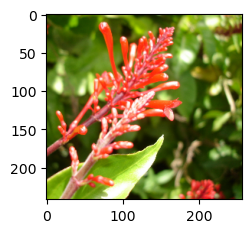

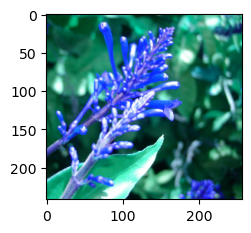

In [20]:
img_i = read_image("flower.png")
img_o = read_image("flower_blue.png")

# Por padrão, o Pytorch utiliza a primeira dimensão do array para armazenar os canais.
# O matplotlib utiliza a última dimensão. Por isso precisamos permutar os arrays
plt.imshow(img_i.permute(1, 2, 0))
plt.figure()
plt.imshow(img_o.permute(1, 2, 0))

In [21]:
# Criação de 3 filtros de tamanho 3x3x3
filt = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, bias=False)
print(filt.weight.shape)
print(filt.weight)

torch.Size([3, 3, 3, 3])
Parameter containing:
tensor([[[[ 0.1698,  0.0942, -0.1218],
          [ 0.1497,  0.0126,  0.1645],
          [-0.0333, -0.1255, -0.1523]],

         [[-0.0948, -0.1639, -0.0799],
          [ 0.0550, -0.1851, -0.0912],
          [ 0.0198, -0.0085,  0.0052]],

         [[ 0.0560, -0.1758, -0.1375],
          [-0.1579,  0.0517, -0.1286],
          [ 0.1064, -0.0485,  0.1042]]],


        [[[ 0.1341,  0.0435, -0.1896],
          [-0.1638, -0.0602, -0.0254],
          [ 0.1614, -0.0788, -0.1165]],

         [[ 0.0889, -0.1598,  0.1010],
          [-0.1325, -0.1343,  0.0972],
          [ 0.0641, -0.0888,  0.0995]],

         [[-0.1500, -0.1037,  0.0619],
          [-0.1274, -0.1852,  0.0750],
          [-0.1063, -0.1383,  0.0209]]],


        [[[ 0.1707, -0.0660,  0.0406],
          [-0.0769,  0.1139,  0.0703],
          [ 0.0074, -0.1727, -0.0838]],

         [[-0.1129,  0.1556,  0.0113],
          [-0.0248, -0.1247, -0.1405],
          [-0.0774, -0.1129, -0.1465]]

In [22]:
learning_rate = 1e-6
num_epochs = 1000

# Converte a imagem para float
x = img_i.float()
# Removemos uma borda de 1 pixel ao redor da imagem pois o resultado da
# convolução será menor do que a imagem original
y = img_o[:, 1:-1, 1:-1].float()

for epoch in range(num_epochs+1):
    output = filt(x)
    # Queremos minimar a diferença entre a imagem de saída e a imagem `y`
    loss = torch.mean((output-y)**2)
    # Remoção dos gradientes calculados na iteração anterior
    filt.zero_grad()
    # Cálculo dos gradientes
    loss.backward()
    # Atualização dos valores dos filtros
    with torch.no_grad():
        filt.weight[:] = filt.weight - learning_rate*filt.weight.grad
    print(f'{epoch}: {loss.item()}') 

0: 41023.19921875
1: 23892.939453125
2: 14155.9921875
3: 8617.9736328125
4: 5464.74560546875
5: 3666.018310546875
6: 2636.67724609375
7: 2044.4190673828125
8: 1700.519287109375
9: 1497.7978515625
10: 1375.3812255859375
11: 1298.6962890625
12: 1248.1060791015625
13: 1212.4561767578125
14: 1185.4097900390625
15: 1163.365478515625
16: 1144.2762451171875
17: 1126.97705078125
18: 1110.8045654296875
19: 1095.3800048828125
20: 1080.4859619140625
21: 1065.9976806640625
22: 1051.841796875
23: 1037.97509765625
24: 1024.3709716796875
25: 1011.0127563476562
26: 997.8892211914062
27: 984.9921875
28: 972.3153076171875
29: 959.8533935546875
30: 947.6018676757812
31: 935.5563354492188
32: 923.7130126953125
33: 912.0682373046875
34: 900.6182861328125
35: 889.359375
36: 878.2883911132812
37: 867.4017333984375
38: 856.6961669921875
39: 846.1685180664062
40: 835.8153076171875
41: 825.6336059570312
42: 815.6204833984375
43: 805.7727661132812
44: 796.0874633789062
45: 786.561767578125
46: 777.1928100585938


363: 157.86663818359375
364: 157.645263671875
365: 157.42520141601562
366: 157.20651245117188
367: 156.98910522460938
368: 156.7730255126953
369: 156.5582275390625
370: 156.34469604492188
371: 156.13243103027344
372: 155.92141723632812
373: 155.71165466308594
374: 155.50308227539062
375: 155.29571533203125
376: 155.0895538330078
377: 154.88455200195312
378: 154.68077087402344
379: 154.47808837890625
380: 154.27658081054688
381: 154.07618713378906
382: 153.87692260742188
383: 153.6787567138672
384: 153.481689453125
385: 153.28570556640625
386: 153.0907745361328
387: 152.8969268798828
388: 152.70411682128906
389: 152.51234436035156
390: 152.32159423828125
391: 152.1318817138672
392: 151.9431610107422
393: 151.7554168701172
394: 151.5686798095703
395: 151.38290405273438
396: 151.1981201171875
397: 151.01426696777344
398: 150.83135986328125
399: 150.64939880371094
400: 150.46835327148438
401: 150.28823852539062
402: 150.1090087890625
403: 149.93069458007812
404: 149.75326538085938
405: 149

752: 113.48493957519531
753: 113.41781616210938
754: 113.3508071899414
755: 113.28392028808594
756: 113.21715545654297
757: 113.15050506591797
758: 113.08397674560547
759: 113.01756286621094
760: 112.9512710571289
761: 112.88508605957031
762: 112.81900787353516
763: 112.7530746459961
764: 112.68722534179688
765: 112.62149810791016
766: 112.555908203125
767: 112.49040985107422
768: 112.42503356933594
769: 112.35977935791016
770: 112.29461669921875
771: 112.22958374023438
772: 112.16465759277344
773: 112.09984588623047
774: 112.03514099121094
775: 111.97053527832031
776: 111.90605926513672
777: 111.84169006347656
778: 111.77742767333984
779: 111.7132797241211
780: 111.64923095703125
781: 111.5853042602539
782: 111.52147674560547
783: 111.45777893066406
784: 111.39415740966797
785: 111.3306655883789
786: 111.26726531982422
787: 111.2039794921875
788: 111.14081573486328
789: 111.0777359008789
790: 111.01476287841797
791: 110.951904296875
792: 110.88915252685547
793: 110.82650756835938
794:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


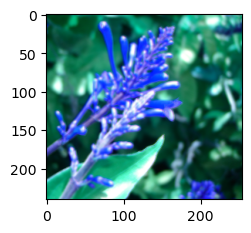

In [23]:
# torch.no_grad evita o cálculo do gradiente. Calcular o gradiente
# não daria erro, mas é um cálculo sem necessidade após a otimização
with torch.no_grad():
    output = filt(x)
plt.imshow(output.int().permute(1, 2, 0))

Criamos um filtro capaz de transformar a imagem de entrada na imagem de saída desejada

In [24]:
print(filt.weight[0])
print(filt.weight[1])
print(filt.weight[2])

tensor([[[ 0.0636,  0.0574, -0.1145],
         [ 0.0781,  0.0141,  0.1824],
         [-0.0685, -0.1132, -0.1289]],

        [[-0.0629, -0.0604,  0.0298],
         [ 0.0954, -0.0725, -0.0033],
         [ 0.0222,  0.0278,  0.0244]],

        [[ 0.1670,  0.0264,  0.0738],
         [-0.0242,  0.2768,  0.0626],
         [ 0.1982,  0.0842,  0.2130]]], grad_fn=<SelectBackward0>)
tensor([[[ 0.1274,  0.0760, -0.1443],
         [-0.1458, -0.0066,  0.0174],
         [ 0.1725, -0.0460, -0.0843]],

        [[ 0.2108, -0.0241,  0.1774],
         [ 0.0317,  0.0434,  0.1774],
         [ 0.2032,  0.0394,  0.1522]],

        [[-0.0619, -0.0058,  0.0936],
         [ 0.0040, -0.0454,  0.1087],
         [-0.0036, -0.0501,  0.0288]]], grad_fn=<SelectBackward0>)
tensor([[[ 2.0492e-01, -1.3478e-03,  1.0102e-01],
         [ 3.1423e-02,  2.7196e-01,  1.9736e-01],
         [ 1.4404e-01, -2.4408e-03,  6.8017e-02]],

        [[-9.8962e-02,  1.5860e-01,  2.9277e-02],
         [ 2.7842e-02, -6.0386e-02, -6.7448e-02]

### Vamos tentar criar um filtro que transforma uma imagem em escala de cinza

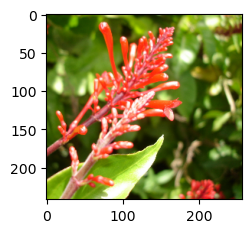

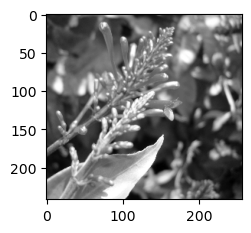

In [25]:
img_i = read_image("flower.png")
img_o = read_image("flower_gray.png")

plt.imshow(img_i.permute(1, 2, 0))
plt.figure()
plt.imshow(img_o.permute(1, 2, 0), 'gray')

In [26]:
filt = torch.nn.Conv2d(in_channels=3, out_channels=1, kernel_size=1, bias=False)

learning_rate = 1e-6
num_epochs = 1000

x = img_i.float()
y = img_o.float()

for epoch in range(num_epochs+1):
    output = filt(x)
    loss = torch.mean((output-y)**2)
    filt.zero_grad()
    loss.backward()
    with torch.no_grad():
        filt.weight[:] = filt.weight - learning_rate*filt.weight.grad
    print(f'{epoch}: {loss.item()}') 

0: 10433.4814453125
1: 8791.2275390625
2: 7410.47900390625
3: 6249.5751953125
4: 5273.49462890625
5: 4452.7919921875
6: 3762.715576171875
7: 3182.456787109375
8: 2694.520751953125
9: 2284.200439453125
10: 1939.131103515625
11: 1648.9189453125
12: 1404.82568359375
13: 1199.504150390625
14: 1026.7789306640625
15: 881.4578247070312
16: 759.1757202148438
17: 656.2630615234375
18: 569.6348266601562
19: 496.69732666015625
20: 435.27020263671875
21: 383.5207214355469
22: 339.9078674316406
23: 303.1358337402344
24: 272.1157531738281
25: 245.93191528320312
26: 223.8145294189453
27: 205.11656188964844
28: 189.29393005371094
29: 175.88916015625
30: 164.51785278320312
31: 154.856689453125
32: 146.6339111328125
33: 139.62103271484375
34: 133.62600708007812
35: 128.48733520507812
36: 124.0691909790039
37: 120.25752258300781
38: 116.95631408691406
39: 114.08488464355469
40: 111.57543182373047
41: 109.37091827392578
42: 107.42339324951172
43: 105.69254302978516
44: 104.14447021484375
45: 102.750686645

358: 18.79009246826172
359: 18.709980010986328
360: 18.6303653717041
361: 18.551233291625977
362: 18.472593307495117
363: 18.394432067871094
364: 18.31675910949707
365: 18.239559173583984
366: 18.16282844543457
367: 18.086563110351562
368: 18.01078224182129
369: 17.935462951660156
370: 17.8606014251709
371: 17.786197662353516
372: 17.712247848510742
373: 17.638755798339844
374: 17.565715789794922
375: 17.49311637878418
376: 17.42096519470215
377: 17.349258422851562
378: 17.277982711791992
379: 17.20713996887207
380: 17.13673973083496
381: 17.066770553588867
382: 16.99721908569336
383: 16.928102493286133
384: 16.85940170288086
385: 16.791122436523438
386: 16.723268508911133
387: 16.65581703186035
388: 16.588783264160156
389: 16.52215576171875
390: 16.455942153930664
391: 16.390125274658203
392: 16.324705123901367
393: 16.259700775146484
394: 16.195083618164062
395: 16.130855560302734
396: 16.0670223236084
397: 16.003570556640625
398: 15.940516471862793
399: 15.877845764160156
400: 15.81

741: 6.790077209472656
742: 6.781796932220459
743: 6.773565769195557
744: 6.765377998352051
745: 6.757236957550049
746: 6.749142169952393
747: 6.741096019744873
748: 6.733096122741699
749: 6.725139141082764
750: 6.717231273651123
751: 6.709364891052246
752: 6.701544761657715
753: 6.693767070770264
754: 6.686035633087158
755: 6.678347587585449
756: 6.670703887939453
757: 6.663105010986328
758: 6.655549049377441
759: 6.648034572601318
760: 6.640562534332275
761: 6.6331329345703125
762: 6.625748634338379
763: 6.618403434753418
764: 6.6111040115356445
765: 6.603840351104736
766: 6.596624851226807
767: 6.589446544647217
768: 6.582308769226074
769: 6.5752129554748535
770: 6.568156719207764
771: 6.5611419677734375
772: 6.554164886474609
773: 6.547227382659912
774: 6.540332317352295
775: 6.533474445343018
776: 6.5266547203063965
777: 6.5198774337768555
778: 6.513134002685547
779: 6.506431579589844
780: 6.4997663497924805
781: 6.493140697479248
782: 6.4865498542785645
783: 6.479998588562012
784

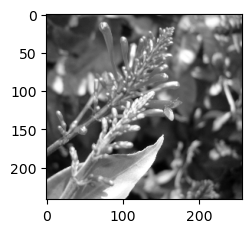

In [27]:
plt.imshow(output[0].int(), 'gray')

In [28]:
print(filt.weight)

Parameter containing:
tensor([[[[0.2785]],

         [[0.5528]],

         [[0.1443]]]], requires_grad=True)
